# Solve Ordinary Differential Equations (ODEs) by Euler Algorithm

In this notebook, I will use an example, which can be solved exactly, to test ODE library I wrote. Then I will implement it to other two examples. 

In [1]:
import numpy as np
import ode # Self-written library
import matplotlib.pyplot as plt
%matplotlib inline

## Dynamical Form for ODEs (Theory)

A standard form for ODEs can be to express ODEs of *any order* as $N$ first-order ODEs simultaneously:

$$ \begin{matrix} \frac{dy^{(0)}}{dt} &=  f^{(0)}(t, y^{(i)}) \\ 
                  \frac{dy^{(1)}}{dt} &=  f^{(1)}(t, y^{(i)}) \\
                  \vdots & \vdots \\
                  \frac{dy^{(N-1)}}{dt} &=  f^{(N-1)}(t, y^{(i)}) 
\end{matrix}$$

where the $y^{(i)}$ dependence of $f$ indicates that it may depend on all the components of $y$, but not on the derivatives $dy^{(i)}/dt$. We can express these equations in more compact form by $N$-dimensional vecotrs $\bf y$ and $\bf f$:

$$  d {\bf y}(t)/dt = {\bf f}(t, {\bf y}) \tag{1}$$

where $\bf y$ and $\bf f$ are defined as

$${\bf y} = \begin{bmatrix} y^{(0)}(t) \\ 
                  y^{(1)}(t) \\
                  \vdots \\
                  y^{(N-1)}(t) 
           \end{bmatrix}; \qquad
  {\bf f} = \begin{bmatrix} f^{(0)}(t, y^{(i)}) \\ 
                  f^{(1)}(t, y^{(i)}) \\
                  \vdots \\
                  f^{(N-1)}(t, y^{(i)}) 
           \end{bmatrix}.        $$

## Solve ODE by Euler Algorithm

Euler's rule is a simple algorithm to integrate the the differential equation (1) by one step. One simply substitutes the forward difference algorithm for the derivative:

$$ \frac{d {\bf y}(t)}{dt} \simeq \frac{{\bf y}(t_{n+1}) - {\bf y}(t_n)}{h} = {\bf f} (t, {\bf y})$$

$$\Rightarrow {\bf y}_{n+1} \simeq {\bf y}_{n} + h {\bf f}(t_n, {\bf y}_n)$$

where $y_n \equiv y(t_n)$ is the value of y at time $t_n$. Note that the approximation,

$$ \frac{d {\bf y}(t)}{dt} \simeq \frac{{\bf y}(t_{n+1}) - {\bf y}(t_n)}{h}, $$

yields the error in order ${\cal O}(h^2)$ so the error in Euler's rule is also in order ${\cal O}(h^2)$.


### Example 1:

In the end, we consider the ODE which can be solved analytically in order to compare the accuracy of Euler's algorithm with exact solution.

$$ y'' = a $$

where $a$ is a constant. Here, we consider $a = -10$. 

One can solve the above ODE exactly. The solutions are given by
$$ y(t) = y(0) + y'(0) t + \frac{1}{2}a t^2,  \qquad y'(t) = y'(0) + at.$$

In mechanics, the ODE governs the dynamics of an object which is doing one-dimensional constant acceleration motion with acceleration ($a$). Hence, $y(t)$ and $y'(t)$ are position and velocity of the particle respectively.


Similar to previous example, we can express the ODE in matrix form,

$$  d {\bf y}(t)/dt = {\bf f}(t, {\bf y}),$$

where
$$ {\bf y} = \begin{bmatrix} y^{(0)}\\
                             y^{(1)}\end{bmatrix}, \qquad 
   {\bf f}(t, {\bf y}) = \begin{bmatrix} y^{(1)}\\
                                         a \end{bmatrix}$$
                                         
Here, we consider the initial conditions, 

$$ {\bf y}_0 = \begin{bmatrix} 0\\
                             20\end{bmatrix},$$
                             
and time interval from 0 to 20.

In [2]:
def f(t, y):
    """ 
    Define f(t, y)
    
    y is an array with shape (2,)
    y[0] = y^{(0)}; y[1] = y^{(1)}
    """
    a = -10.0
    f = np.concatenate( (y[-len(y) + 1:], np.array([a]) ), axis = 0)
    return f

In [3]:
# number of steps is set as 101 by default
r = ode.Euler(f, y0=[0, 20], tspan=[0, 5])

In [4]:
t, y = r.integrate()

**Plot y(t) vs t**:

In [5]:
def position(t):
    y_0 = 0
    v_0 = 20
    a = -10.0
    return y_0 +v_0*t + (a/2.0)*t**2

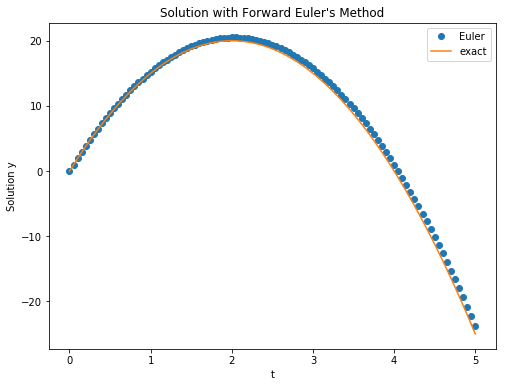

In [6]:
# Plot y vs x
plt.figure(figsize=(8,6))
plt.plot(t, np.squeeze(y[0,:]), 'o', label='Euler')
plt.plot(t, position(t), '-', label='exact')
plt.xlabel('t')
plt.ylabel('Solution y')
plt.legend()
plt.title("Solution with Forward Euler's Method")
plt.show()

As one can see in above figure, when $t$ becomes larger (about $t> 1$), $y(t)$ obtained from Euler algorithm starts to deviate from the $y(t)$ from exact solution. If one wants to get more accurate results, one has to implement other algorithms, like Runge-Kutta Algorithm, to get more accurate results.

**Plot y'(t) vs t**

In [7]:
def velocity(t):
    v_0 = 20
    a = -10.0
    return v_0 + a*t

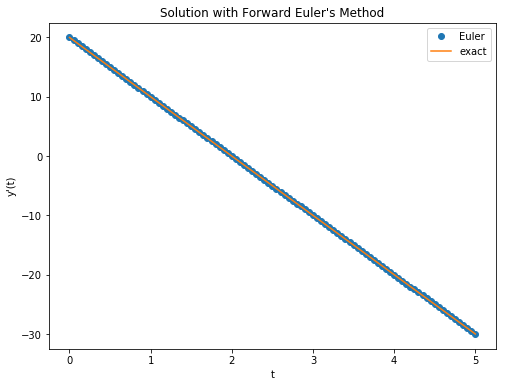

In [8]:
# Plot y vs x
plt.figure(figsize=(8,6))
plt.plot(t, np.squeeze(y[1,:]), 'o', label='Euler')
plt.plot(t, velocity(t), '-', label='exact')
plt.xlabel('t')
plt.ylabel("y'(t)")
plt.legend()
plt.title("Solution with Forward Euler's Method")
plt.show()

As we can see in abover figure for $y'(t)$ vs $t$, it agrees well.

**Why does $y(t)$ from Euler algorithm deviates from $y(t)$ from exact solution earlier than $y'(t)$?**

Let's take a look at ${\bf y}_{n+1} - {\bf y}_{n}$ in Euler algorithm:

$${\bf y}_{n+1}-{\bf y}_{n} \simeq  + h {\bf f}(t_n, {\bf y}_n) = h \begin{bmatrix} y^{(1)}(t_n)\\
                                         a \end{bmatrix} \tag{2}$$


In exact solution, ${\bf y}_{n+1} - {\bf y}_{n}$ leads to

$${\bf y}_{n+1}-{\bf y}_{n} = \begin{bmatrix} y^{(0)}(0) + y^{(1)}(0)(t_n + h) + \frac{1}{2}a (t_n + h)^2\\
                                         y^{(1)}(0) + a(t_n+h) \end{bmatrix} - 
                              \begin{bmatrix} y^{(0)}(0) + y^{(1)}(0)(t_n) + \frac{1}{2}a (t_n)^2\\
                                         y^{(1)}(0) + a(t_n) \end{bmatrix} \\
                            =  h \begin{bmatrix} (y^{(1)}(0) + a \times t_n ) + \frac{1}{2}a h\\
                                         a \end{bmatrix} = h \begin{bmatrix} y^{(1)}(t_n) + \frac{1}{2}a h\\
                                         a \end{bmatrix} \tag{3}$$
                                       
                                         
where $t_{n+1} = t_n + h$. By comparing Eq. (2) with (3), it is clear that the solutions for $y^{(1)}(t)$ (velocity) are the same for both exact solution and solution from Euler approximation. In contrast, solution to $y^{(0)}(t)$ (position) from Euler's approximation has an error in order ${\cal O}(h^2)$!  

### Example 2

Let's consider the following initial value problem:

$$ y' = - y + sin(x), \qquad y(0) = 1 $$

Express above ODE in form of Eq. (1):

$$ {\bf y} = [y(x)], \qquad {\bf f}(x, {\bf y}) = [-y(x) + \sin(x)]$$

with initial condition

$$ {\bf y}_0 = [y(0)].$$

We consider $x$ interval from 0 to 10.

In [9]:
def f(x, y):
    """ Define f(x, y) """
    
    f = np.array([ (-1)*y[0] + np.sin(x)  ]) 
    return f 

In [12]:
# number of steps is set as 101 by default
r = ode.Euler(f, y0=[1], tspan=[0, 10])

In [13]:
x, y = r.integrate()

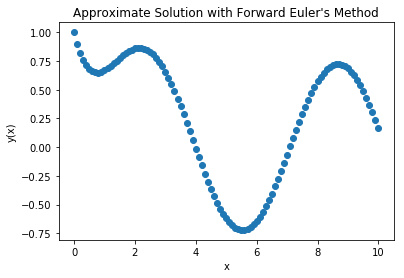

In [14]:
# Plot y vs x
plt.plot(x, np.squeeze(y), 'o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title("Approximate Solution with Forward Euler's Method")
plt.show()

The behavior of the results is consistent with the [reference](http://faculty.washington.edu/heathml/2018spring307/euler_method.pdf).

### Example 3

The van der Pol equation is a second order ODE: [[Reference](https://www.mathworks.com/help/matlab/ref/ode23.html)]

$$ y'' - \mu (1-y^2) y' + y = 0,$$

where $\mu > 0$ is a scalar parameter. Here, we consider $\mu = 1$.

We can rewrite this equation as a system of first-order ODEs. First, we define the following quantities,
$$ y^{(0)} \equiv y(t),  \qquad y^{(1)} \equiv y' = \frac{d y^{(0)}}{dt}$$

so $y''$ can be expressed as
$$ y'' = \frac{d y^{(1)}}{dt} = \mu (1- [y^{(0)}]^2) y^{(1)} - y^{(0)}.$$

Thus, we can express the ODE in matrix form,

$$  d {\bf y}(t)/dt = {\bf f}(t, {\bf y}),$$

where
$$ {\bf y} = \begin{bmatrix} y^{(0)}\\
                             y^{(1)}\end{bmatrix}, \qquad 
   {\bf f}(t, {\bf y}) = \begin{bmatrix} y^{(1)}\\
                                         \mu (1- [y^{(0)}]^2) y^{(1)} - y^{(0)} \end{bmatrix}$$
                                         
Here, we consider the initial conditions, 

$$ {\bf y}_0 = \begin{bmatrix} 2\\
                             0\end{bmatrix},$$
                             
and time interval from 0 to 20.

In [15]:
def f(t, y):
    """ 
    Define f(t, y) 
    
    y is an array with shape (2,)
    y[0] = y^{(0)}; y[1] = y^{(1)}
    """
    mu = 1
    f = np.concatenate( (y[-len(y) + 1:], np.array([ mu*(1- y[0]**2)*y[1] - y[0]  ]) ), axis = 0)
    return f

In [16]:
# number of steps is set as 101 by default
r = ode.Euler(f, y0=[2, 0], tspan=[0, 20], steps = 201)

In [17]:
t, y = r.integrate()

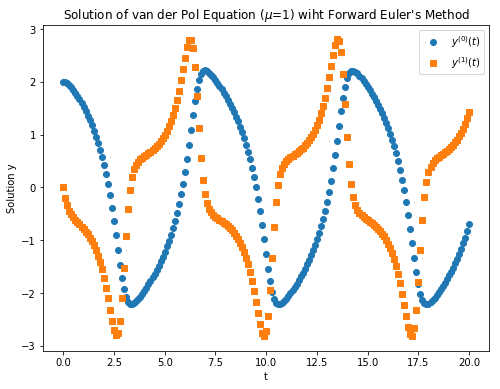

In [18]:
# Plot y and y' vs x
plt.figure(figsize=(8,6))
plt.plot(t, np.squeeze(y[0,:]), 'o', label = '$y^{(0)}(t)$')
plt.plot(t, np.squeeze(y[1,:]), 's', label = '$y^{(1)}(t)$')
plt.xlabel('t')
plt.ylabel('Solution y')
plt.legend()
plt.title("Solution of van der Pol Equation ($\mu$=1) wiht Forward Euler's Method")
plt.show()

The behaviors of $y$ and $y'$ are consistent with the results on Matlab [website](https://www.mathworks.com/help/matlab/ref/ode23.html). 